# Model 1


In [41]:
# Packages
import sys
import os
# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))
# Import module
from Logistic_Regression_Functions import *

# Model name
model_name = 'smote_rating_change_model_1'

In [42]:
# Load the data
df = load_data()

In [43]:
# Get the column names and mapping
numeric_feature_columns, cat_feature_columns, target_column, custom_mapping = get_column_names_and_mapping_change(model_name)

In [44]:
# Create matrices
X_train_scaled, X_test_scaled, y_train, y_test, _ = prepare_matrices(df, numeric_feature_columns, cat_feature_columns, target_column, custom_mapping)

feature names: 
['num__Altman_Z' 'num__Altman_Z_diff']


In [45]:
from imblearn.over_sampling import SMOTE
unique, count = np.unique(y_train, return_counts=True)
dict_value_count = {k:v for (k, v) in zip(unique, count)}
print(dict_value_count)
sm = SMOTE(sampling_strategy={-1:4000, 1:4000})
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)
unique, count = np.unique(y_train_sm, return_counts=True)
dict_value_count = {k:v for (k, v) in zip(unique, count)}
print(dict_value_count)

{-1: 100, 0: 4156, 1: 135}
{-1: 5000, 0: 4156, 1: 5000}


In [46]:
# Train model
best_model = train_model_with_grid_search(X_train_sm, y_train_sm, model_name)

Tuned hyperparameters: {'C': 0.01, 'class_weight': None, 'l1_ratio': 1.0, 'multi_class': 'ovr', 'penalty': 'elasticnet', 'solver': 'saga'}
Train accuracy of best model:  0.4162899124046341
Best mean CV accuracy: 0.4175610971747421
Coefficients: [[-0.02975627 -0.15881395]
 [-0.06118445  0.        ]
 [ 0.09945402  0.1961792 ]]
Corresponding class: [-1  0  1]


In [47]:
# Get predictions
get_model_predictions(best_model, X_test_scaled, y_test, custom_mapping, model_name, target_column, df)

X_test_scaled shape
(1118, 2)
y_test shape
(1118,)
accuracy: 0.025044722719141325
share of correct predictions: 0.025044722719141325
assertion that they match:


{'accuracy': 0.025044722719141325, 'f1_score': 0.0024237605632954472, 'majority_baseline': 0.9534883720930233}
Share of predictions exactly as the actual: 2.50%
Share of predictions 1 or fewer ratings away from actual: 97.85%
classification report:
                                         precision    recall  f1-score   support

Downgrade Since Last Fixed Quarter Date     0.0198    0.6500    0.0385        20
        Same As Last Fixed Quarter Date     0.0000    0.0000    0.0000      1066
  Upgrade Since Last Fixed Quarter Date     0.0324    0.4688    0.0606        32

                               accuracy                         0.0250      1118
                              macro avg     0.0174    0.3729    0.0330      1118
                           weighted avg     0.0013    0.0250    0.0024      1118

counts of y_test values
Change Direction Since Last Fixed Quarter Date
Same As Last Fixed Quarter Date            1066
Upgrade Since Last Fixed Quarter Date        32
Downgrade Sinc

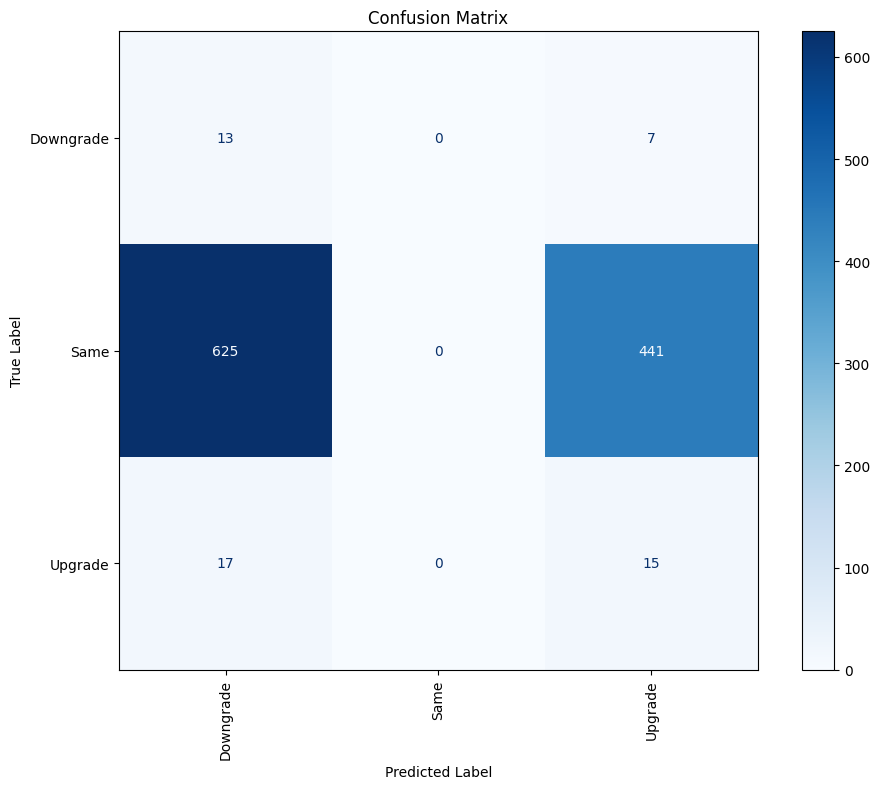

In [48]:
create_model_figure_and_table_components(model_name, target_column, custom_mapping)